In [1]:
import matplotlib.pyplot as plt
# ^^^ pyforest auto-imports - don't write above this line
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
import datetime
import calendar
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("uberdata.csv")

In [3]:
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### MISSING VALUES 

In [4]:

df.isnull().any()

START_DATE*    False
END_DATE*       True
CATEGORY*       True
START*          True
STOP*           True
MILES*         False
PURPOSE*        True
dtype: bool

In [5]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [8]:
df.dtypes

START_DATE*     object
END_DATE*       object
CATEGORY*       object
START*          object
STOP*           object
MILES*         float64
PURPOSE*        object
dtype: object

In [9]:
df['START_DATE*'] = pd.to_datetime(df['START_DATE*'],format='%m/%d/%Y %H:%M')
df['END_DATE*'] = pd.to_datetime(df['END_DATE*'],format='%m/%d/%Y %H:%M')

In [10]:
df.dtypes

START_DATE*    datetime64[ns]
END_DATE*      datetime64[ns]
CATEGORY*              object
START*                 object
STOP*                  object
MILES*                float64
PURPOSE*               object
dtype: object

In [11]:
hour = []
day = []
month = []
weekday = []
dayofweek = []

for x in df['START_DATE*']:
    hour.append(x.hour)
    day.append(x.day)
    month.append(x.month)
    dayofweek.append(x.dayofweek)
    weekday.append(calendar.day_name[dayofweek[-1]])
    
df['hour'] = hour
df['day'] = day
df['month'] = month
df['weekday'] = weekday 
df['dayofweek'] = dayofweek

In [12]:
df

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,hour,day,month,weekday,dayofweek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,21,1,1,Friday,4
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,20,2,1,Saturday,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,17,5,1,Tuesday,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,14,6,1,Wednesday,2
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,17,6,1,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,1,31,12,Saturday,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,13,31,12,Saturday,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,15,31,12,Saturday,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,21,31,12,Saturday,5


### CATEGORIES 

In [13]:
df['CATEGORY*'].value_counts()

Business    647
Personal      6
Name: CATEGORY*, dtype: int64

<AxesSubplot:xlabel='CATEGORY*', ylabel='count'>

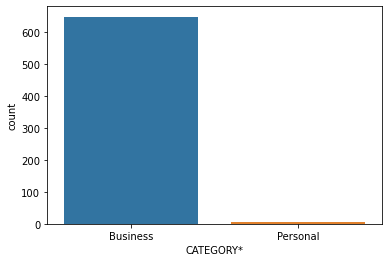

In [14]:
sns.countplot(df['CATEGORY*'])

### how long do people travel with uber?

<AxesSubplot:ylabel='Frequency'>

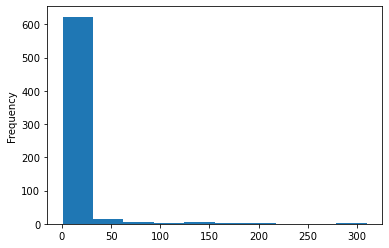

In [15]:
df['MILES*'].plot.hist()
#most people travel in between 0-30 miles, some have reached the 30-50 mile mark 

### what hour do most people take uber?

Text(0.5, 1.0, 'number of trips vs hours')

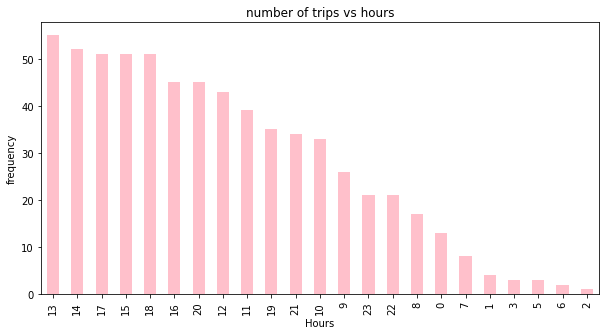

In [21]:
hrs=df['hour'].value_counts()
hrs.plot(kind='bar',color='pink',figsize=(10,5))
plt.xlabel('Hours')
plt.ylabel('frequency')
plt.title('number of trips vs hours')
#as is visible, are 1 o clock maximum rides are booked, followd by 2, and then 5 o clock. 
# it's best to send out targeted ads and deals to people at these times as opposed to something like 7 pm, to get more benefits.

### checking purpose of trips 

<AxesSubplot:>

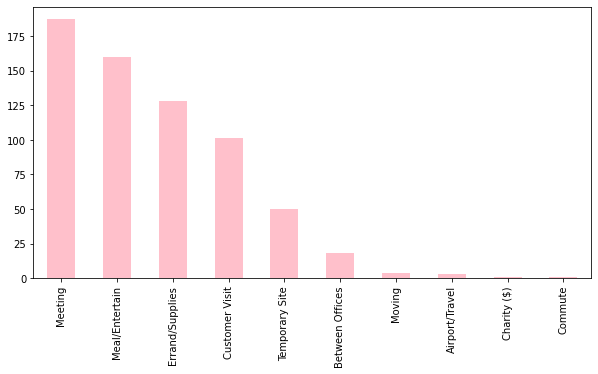

In [20]:
df['PURPOSE*'].value_counts().plot(kind='bar',figsize=(10,5),color='pink')
#as is visible, most people head out for meetings, when uber has to find a target audience, they can look at people who go for meetings, say at 2 pm, and send message prompts. next, there are people who book for meal/entertainment, give 10  percent discount.

### which day has highest number of trips

<AxesSubplot:>

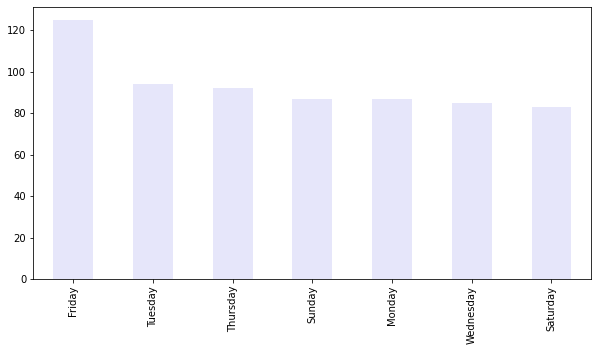

In [23]:
df['weekday'].value_counts().plot(kind='bar',figsize=(10,5),color='lavender')
#as is visible, fridays are most viable to give out coupons, discounts, etc

### what are number of trips people embark on each day 

<AxesSubplot:>

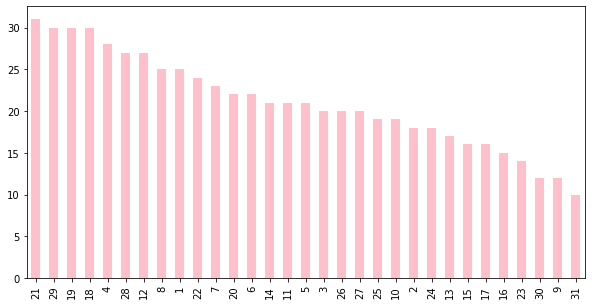

In [24]:
df['day'].value_counts().plot(kind='bar',figsize=(10,5),color='pink')
#as is visible, most people travel on the 21st. also, notice that there are a lot of bookings on the 29th, as opposed to 
#30th and 31st.  

### which month has max rides

<AxesSubplot:>

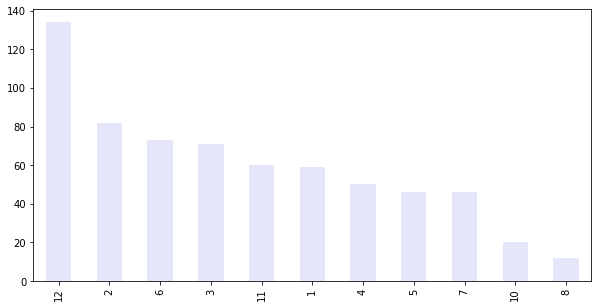

In [33]:
df['month'].value_counts().plot(kind='bar',figsize=(10,5),color='lavender')
#we observe that maximum of the rides are booked in december, and that august have least rides booked. max profit will be gained in december
#12, 2, 6, and 3 will be highest, 11,1,4,5,7 normal and 10 and 8 will be the lowest performing months

### starting point of trips 

<AxesSubplot:>

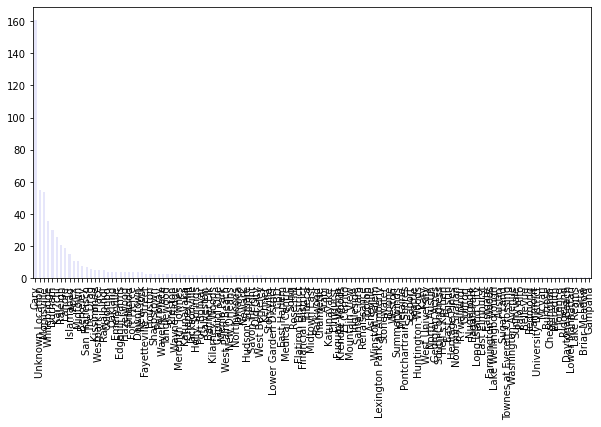

In [34]:
df['START*'].value_counts().plot(kind='bar',figsize=(10,5),color='')
#using this, we find out that most people start from Cary. we can also give location based benefits to people around that area to target more users